In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms

In [2]:

BATCH_SIZE = 64
LEARNING_RATE = 0.003
TRAIN_DATA_PATH = r"C:\Users\indian\Desktop\dataset\train"
TEST_DATA_PATH = r"C:\Users\indian\Desktop\dataset\test"
TRANSFORM_IMG = transforms.Compose([
    #transforms.Resize(21),
    #transforms.CenterCrop(21),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5] )
    ])

print(TRANSFORM_IMG)

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False) 


Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


In [3]:
print(len(train_data))
indexs = list(range(len(train_data)))
#print(len(indexs))
print(indexs[0:2])
print(len(test_data))
indexs = list(range(len(test_data)))
#print(len(indexs))
print(indexs[0:2])
#print(len(train_data_loader.dataset))

440
[0, 1]
30
[0, 1]


In [4]:
dataiter = iter(train_data_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 800, 800])
torch.Size([64])


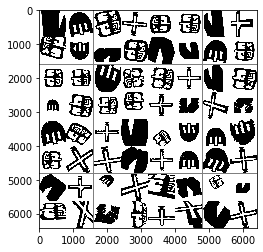

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [29]:
from torch import nn, optim
import torch.nn.functional as F

In [48]:
#Build a fed-forward method
model = nn.Sequential(nn.Linear(3 * 800 * 800, 64), #input,hidden
                      nn.ReLU(),
                      nn.Linear(64, 32), 
                      nn.ReLU(),
                      nn.Linear(32, 10), #hidden, output
                      nn.LogSoftmax(dim = 1)) 

print(model)

Sequential(
  (0): Linear(in_features=1920000, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [49]:
#criterion =  nn.CrossEntropyLoss(); orrrrr
criterion = nn.NLLLoss()

images, labels = next(iter(train_data_loader))

images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

tensor(2.2955, grad_fn=<NllLossBackward>)


In [22]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-7.6203e-05, -7.6203e-05, -7.6203e-05,  ..., -1.5380e-03,
         -1.5380e-03, -1.5380e-03],
        [-6.8832e-03, -6.8832e-03, -6.8832e-03,  ..., -7.0453e-03,
         -7.0453e-03, -7.0453e-03],
        [-4.8065e-04, -4.8065e-04, -4.8065e-04,  ..., -4.8065e-04,
         -4.8065e-04, -4.8065e-04],
        ...,
        [ 4.8036e-04,  4.8036e-04,  4.8036e-04,  ...,  4.8036e-04,
          4.8036e-04,  4.8036e-04],
        [-3.3948e-03, -3.3948e-03, -3.3948e-03,  ..., -3.5996e-03,
         -3.5996e-03, -3.5996e-03],
        [ 9.7896e-03,  9.7896e-03,  9.7896e-03,  ...,  9.7896e-03,
          9.7896e-03,  9.7896e-03]])


In [23]:
#using the above gradients need to intialize the weights / update
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.003)

In [25]:
print('Initialize weights : ', model[0].weight)
images, labels = next(iter(train_data_loader))
images.resize_(64, 1920000)
optimizer.zero_grad()
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('gradeint : - ', model[0].weight.grad)

Initialize weights :  Parameter containing:
tensor([[-3.2385e-04, -2.5142e-04,  4.2543e-04,  ..., -3.7234e-04,
          9.8495e-05,  2.2969e-04],
        [-1.6074e-04,  7.4988e-05,  5.3614e-04,  ..., -6.5757e-04,
         -4.2761e-04,  1.1809e-05],
        [ 6.6411e-04,  6.8200e-04, -2.1269e-04,  ..., -1.7931e-04,
         -2.3948e-04,  6.5089e-04],
        ...,
        [ 1.1599e-04, -2.7594e-04,  6.5732e-04,  ...,  7.1625e-04,
          4.0663e-04, -2.3294e-04],
        [ 5.5245e-04, -6.4832e-04, -2.0451e-04,  ..., -4.4786e-04,
         -1.5756e-05, -2.7640e-04],
        [ 3.5053e-04, -2.4158e-04,  3.4338e-04,  ..., -4.0098e-04,
         -1.3172e-04,  5.5126e-04]], requires_grad=True)
gradeint : -  tensor([[-4.4093e-04, -4.4093e-04, -4.4093e-04,  ..., -4.4093e-04,
         -4.4093e-04, -4.4093e-04],
        [-8.6582e-03, -8.6582e-03, -8.6582e-03,  ..., -7.7302e-03,
         -7.7302e-03, -7.7302e-03],
        [-4.9161e-05, -4.9161e-05, -4.9161e-05,  ...,  6.9439e-04,
          6.9439e

In [26]:
optimizer.step()
print('Update weights : -', model[0].weight)

Update weights : - Parameter containing:
tensor([[-3.2253e-04, -2.5009e-04,  4.2675e-04,  ..., -3.7102e-04,
          9.9818e-05,  2.3101e-04],
        [-1.3477e-04,  1.0096e-04,  5.6211e-04,  ..., -6.3438e-04,
         -4.0442e-04,  3.5000e-05],
        [ 6.6426e-04,  6.8214e-04, -2.1255e-04,  ..., -1.8139e-04,
         -2.4156e-04,  6.4880e-04],
        ...,
        [ 1.1424e-04, -2.7769e-04,  6.5557e-04,  ...,  7.1190e-04,
          4.0227e-04, -2.3729e-04],
        [ 5.4858e-04, -6.5218e-04, -2.0837e-04,  ..., -4.5172e-04,
         -1.9619e-05, -2.8027e-04],
        [ 3.0319e-04, -2.8892e-04,  2.9604e-04,  ..., -4.4389e-04,
         -1.7464e-04,  5.0834e-04]], requires_grad=True)


In [27]:
criterion = nn.NLLLoss()

images, labels = next(iter(train_data_loader))

images = images.view(images.shape[0], -1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

tensor(1.9589, grad_fn=<NllLossBackward>)


In [60]:
epoches = 2
#fit(epochs, model, loss, train_data_loader)
model.eval()

accuracy = 0
with torch.no_grad():
    model.eval()
    for images, lables in train_data_loader:
        output = model(images)
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
            
    model.train()
        
    train_losses.append(loss1 / len(train_data_loader))
    test_losses.append(loss1 / len(testloader))
         
    c = (accuracy / len(testloader)) * 100
    print("Epoch {}/{}.. ".format(i+1, epoches),
              "test_accuracy : {:.3f}.. ".format(c))

RuntimeError: size mismatch, m1: [153600 x 800], m2: [1920000 x 64] at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:752